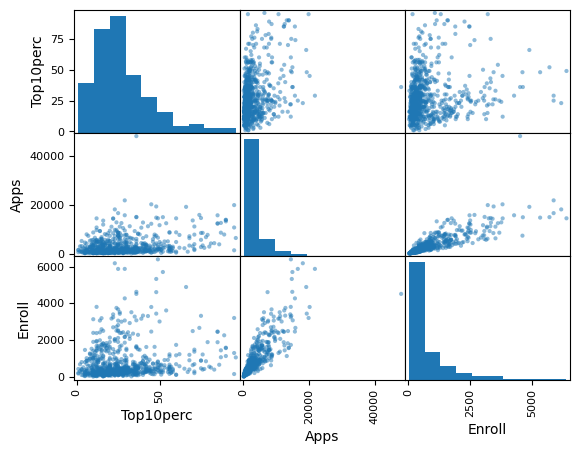

In [97]:
import pandas as pd
import numpy as np

c = pd.read_csv("/Users/julien/Downloads/College.csv", index_col=0)

pd.plotting.scatter_matrix(c[["Top10perc","Apps","Enroll"]]);

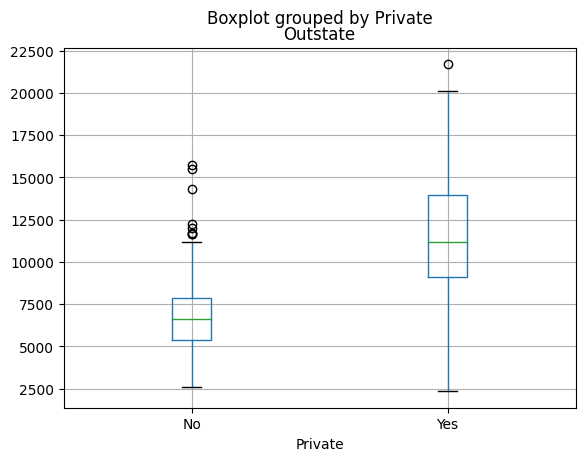

In [98]:
c.boxplot(column="Outstate",by="Private");
#c.columns

In [99]:
c["Elite"] = pd.cut(c["Top10perc"],[0,50,100],labels=["No","Yes"])
c["Elite"].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

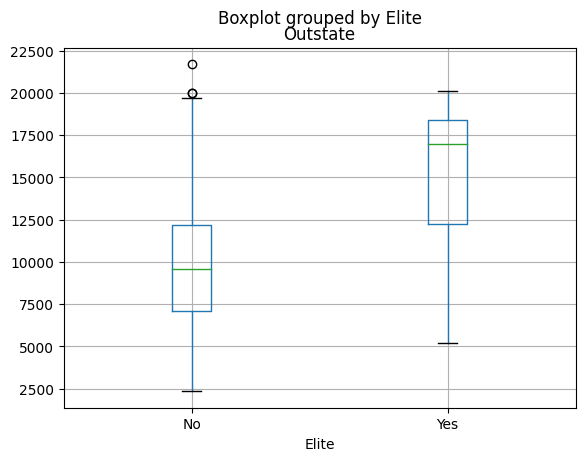

In [100]:
c.boxplot(column="Outstate",by="Elite");

array([<AxesSubplot: title={'center': 'Expend'}>], dtype=object)

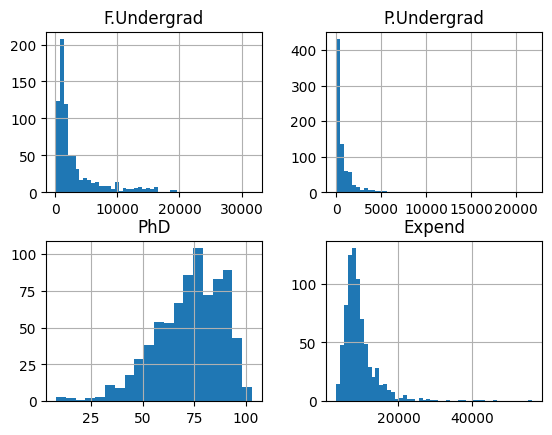

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)

c.hist("F.Undergrad",bins=50, ax = ax[0,0])
c.hist("P.Undergrad",bins=50, ax = ax[0,1])
c.hist("PhD",bins=20, ax = ax[1,0])
c.hist("Expend",bins=50, ax = ax[1,1])


In [102]:
# Exercice 9
a = pd.read_csv("/Users/julien/Downloads/Auto.csv").dropna()
a.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [103]:
quantitative_columns = []
for column in a.columns:
    print(f"{column}")
    nb_values = len(a[column].unique())
    if nb_values > 5:
        print("- Quantitative")
        quantitative_columns.append(column)
    else:
        print("- Qualitative")
    print(f"- {nb_values} different values")

    if a[column].dtype == np.dtype(float) or a[column].dtype == np.dtype(int):
        a_clean = a.drop(np.arange(10,85))
        print(f"- Range: [{a[column].min()} , {a[column].max()}]  -  [{a_clean[column].min()} , {a_clean[column].max()}]")
        print(f"- Mean/std {a[column].mean()} / {a[column].std()}  -  {a_clean[column].mean()} / {a_clean[column].std()}")

# Origin and cylinder

mpg
- Quantitative
- 127 different values
- Range: [9.0 , 46.6]  -  [11.0 , 46.6]
- Mean/std 23.445918367346938 / 7.8050074865717995  -  24.374763406940065 / 7.872564543483587
cylinders
- Qualitative
- 5 different values
- Range: [3 , 8]  -  [3 , 8]
- Mean/std 5.471938775510204 / 1.7057832474527845  -  5.381703470031546 / 1.6581347994229967
displacement
- Quantitative
- 81 different values
- Range: [68.0 , 455.0]  -  [68.0 , 455.0]
- Mean/std 194.41198979591837 / 104.64400390890466  -  187.8801261829653 / 100.16997334270233
horsepower
- Quantitative
- 93 different values
- Range: [46 , 230]  -  [46 , 230]
- Mean/std 104.46938775510205 / 38.49115993282849  -  101.0031545741325 / 36.003208227537144
weight
- Quantitative
- 346 different values
- Range: [1613 , 5140]  -  [1649 , 4997]
- Mean/std 2977.5841836734694 / 849.4025600429492  -  2938.8548895899053 / 811.640667914713
acceleration
- Quantitative
- 95 different values
- Range: [8.0 , 24.8]  -  [8.5 , 24.8]
- Mean/std 15.5413265306122

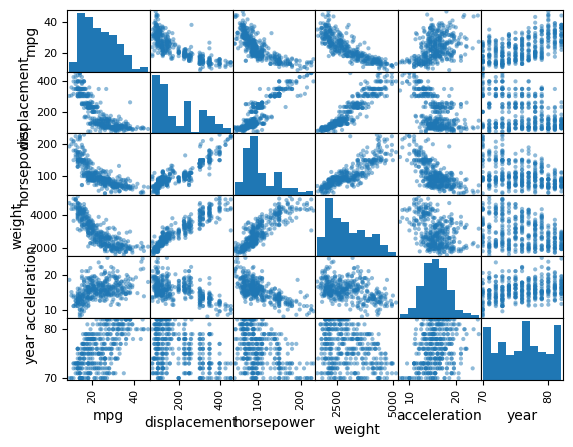

In [104]:
pd.plotting.scatter_matrix(a[quantitative_columns]);

# To predict mpg, it seems that displacement, horsepower and weight have a relationship with the response.

In [106]:
# Exercice 10

from ISLP import *

c = pd.read_csv("/Users/julien/Downloads/College.csv", index_col=0)

Boston = load_data("Boston")
Boston.shape

# For info about the columns cf. https://islp.readthedocs.io/en/latest/datasets/Boston.html

(506, 13)

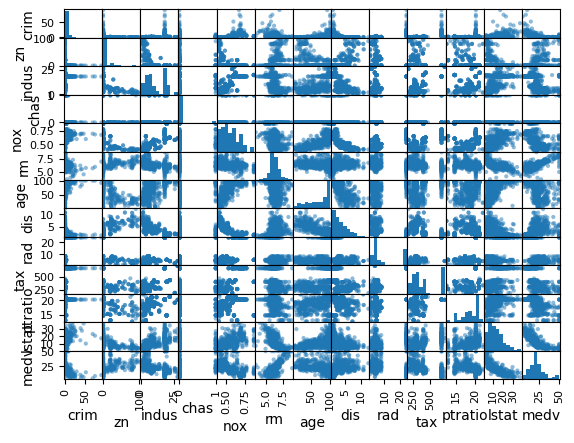

In [112]:
# ["crim","zn","indus","nox","rm","age","tax","ptratio","lstat","medv"]
pd.plotting.scatter_matrix(Boston);

# Maybe Indus seems to have a value that seems to have high crime rate?

In [123]:
Boston[["crim","tax","ptratio"]].describe()


,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


In [124]:

# 380 suburb seems to have a high crime rate which is way above the mean
Boston[Boston.crim == Boston.crim.max()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4


In [125]:
Boston.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

In [126]:
Boston["ptratio"].median()

19.05

In [128]:
Boston[Boston.medv == Boston.medv.min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [131]:
print(f"Nb suburbs with more than X rooms on avg: >7: {len(Boston[Boston.rm > 7])} / >8: {len(Boston[Boston.rm > 8])}")

Avg: >7: 64 / >8: 13


In [132]:
Boston[Boston.rm > 8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0
